In [1]:
#Import Packages
import pandas_datareader.data as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import yfinance as yf


In [2]:
#Define Data
asset = ['X',
         'aapl',
         'INTC',
         'TSLA']

In [3]:
#Download data 
dataset = yf.download(asset, 
                      start='2019-01-01', 
                      end='2022-04-18', 
                      progress=False,
)['Close']

dataset.head()
dataset.sort_index(inplace=True)
print(dataset.head())

                 AAPL       INTC       TSLA          X
Date                                                  
2018-12-31  39.435001  46.930000  66.559998  18.240000
2019-01-02  39.480000  47.080002  62.023998  18.510000
2019-01-03  35.547501  44.490002  60.071999  18.480000
2019-01-04  37.064999  47.220001  63.537998  20.340000
2019-01-07  36.982498  47.439999  66.991997  20.450001


In [4]:
#Returns and Statistics
returns = dataset.pct_change()
print(returns.head())
print(returns.describe())


                AAPL      INTC      TSLA         X
Date                                              
2018-12-31       NaN       NaN       NaN       NaN
2019-01-02  0.001141  0.003196 -0.068149  0.014803
2019-01-03 -0.099607 -0.055013 -0.031472 -0.001621
2019-01-04  0.042689  0.061362  0.057697  0.100649
2019-01-07 -0.002226  0.004659  0.054361  0.005408
             AAPL        INTC        TSLA           X
count  829.000000  829.000000  829.000000  829.000000
mean     0.001957    0.000267    0.004150    0.001743
std      0.021292    0.024373    0.042364    0.042305
min     -0.128647   -0.180415   -0.210628   -0.170319
25%     -0.007926   -0.009641   -0.017254   -0.022578
50%      0.001517    0.000000    0.002618    0.000000
75%      0.013055    0.011454    0.023581    0.024331
max      0.119808    0.195213    0.198949    0.232699


          AAPL      INTC      TSLA         X
AAPL  1.000000  0.566024  0.459934  0.251484
INTC  0.566024  1.000000  0.360170  0.300486
TSLA  0.459934  0.360170  1.000000  0.262167
X     0.251484  0.300486  0.262167  1.000000


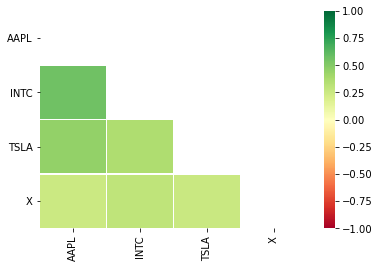

In [5]:
#Correlation
returns.corr()
print(returns.corr())
mask = np.zeros_like(returns.corr())
mask[np.triu_indices_from(mask)] = True
seaborn.heatmap(returns.corr(), cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=0.5)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()